Given the following patterns

$$P_1, t_1 = (2,6) , A $$
$$P_2, t_2 = (4,4) , A $$
$$P_3, t_3 = (6,3) , A $$
$$P_4, t_4 = (4,10) , B $$
$$P_5, t_5 = (7,10) , B $$
$$P_6, t_6 = (9,8) , B $$

Train a perceptron using the perceptron rule

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [336]:
import numpy as np

#create input vector 
def createInputVector():
    p[0] = [2,6];
    p[1] = [4,4];
    p[2] = [6,3];
    p[3] = [4,10];
    p[4] = [7,10];
    p[5] = [9,8];
    print("p:",str(p));
    
p = np.zeros((6,2));
createInputVector();

p: [[ 2.  6.]
 [ 4.  4.]
 [ 6.  3.]
 [ 4. 10.]
 [ 7. 10.]
 [ 9.  8.]]


In [337]:
#create target vector A = 1 and B = 1 
def createTargetVector():
    t[0] = 1;
    t[1] = 1;
    t[2] = 1;
    t[3] = -1;
    t[4] = -1;
    t[5] = -1;
    print("t:",str(t));
    
t = np.zeros(6);
createTargetVector();

t: [ 1.  1.  1. -1. -1. -1.]


In [338]:
# translate perceptron output
def translatePerceptronOutput(p, output):
    if output == 1:
        print(str(p), "classified as A");
    else:
        print(str(p), "classified as B");

In [368]:
#define perceptron class
class ADALINE:
    
    def __init__(self, p_training, t_training, learning_rate ):
        self.P = p_training;
        self.T = t_training;
        self.alfa = learning_rate;
    
        self.E = np.ones(len(self.P));
        
        self.initW();
        self.initBias();
    
    def initW(self):
        """Initialize perceptron weights"""
        #self.W = np.random.rand(len(self.P[0]));
        
        self.W = np.array([-1, -1, 10]);
        print("W:", str(self.W));
        
    def initBias(self):
        """Initialize perceptron bias"""
        #self.bias = np.random.rand();
        self.bias = 10;
        input_shape = self.P.shape;
        input_shape = list(input_shape)
        input_shape[1] = input_shape[1] + 1;
        input_shape = tuple(input_shape)
        
        self.extended_P = np.zeros(input_shape);
        for index in range(len(self.P)):
            self.extended_P[index,0] = self.P[index,0];
            self.extended_P[index,1] = self.P[index,1];
            self.extended_P[index,2] = 1;
        self.P = self.extended_P;
        print(self.P);
        print("bias:", self.bias);
        
        
        
    def trainDeltaLearningRule(self, max_epoch):
        iterations = 0;
        self.max_epoch = max_epoch;
        
        self.plotTrainingSet();
        self.plotDecisionBoundary('red','initial boundary');
        
        while((iterations < self.max_epoch)):
            print("Iteration------------------", iterations);
            for index in range(len(self.P)):
                print("input:", str(self.P[index]));
                print("weight:", self.W);
                print("dotProduct:", np.dot(self.P[index],self.W));
                
                #network output
                a = self.purelin(np.dot(self.P[index],self.W));
                print("a:",a);
                
                #input error
                self.E[index] = self.T[index] - a;
                print("E:", self.E[index]);
                
                # learning rule
                self.W = self.W + self.alfa * ( self.E[index] * self.P[index]);
                #self.bias = self.bias + (self.alfa * self.E[index]);
                print("new weight:", self.W);
            print("MSE" , self.MSE());
            iterations = iterations + 1;
        
        self.plotDecisionBoundary('green','final boundary');
        plt.legend(loc="upper right");
        print("Iterations:", iterations);
    
    def isTrainingCompleted(self):
        for error in self.E:
            if error != 0:
                return False;
        print("Training completed!")
        return True;
    
    def purelin(self, x):
        return x;
        
    def evaluate(self, new_p):
        np.concatenate((new_p, [1]), axis=0)
        print(new_p)
        return self.purelin(np.dot(new_p,self.W));
    
    def plotDecisionBoundary(self, color, label):
        print('bias:',self.bias);
        print('W:',self.W);
        plt.xlim([-1.0, 20.0]);
        plt.ylim([-1.0, 20.0]);
        
        x = np.linspace(-1, 20);
        y = - (self.W[2] / self.W[1]) - ((x * self.W[0]) / self.W[1]);

        plt.plot(x, y, color=color, label=label);
    
    def plotTrainingSet(self):
        plt.plot(perc.P[0:3,0],perc.P[0:3,1], 's', color='black', label='A');
        plt.plot(perc.P[3:7,0],perc.P[3:7,1], '^', color='black', label='B');
        
    def MSE(self):
        print("Error array:", str(self.E));
        
        return np.sum(np.multiply(self.E, self.E))/ len(self.E);
        

In [369]:
#create perceptron object
ada = ADALINE(p,t, 0.0001);

W: [-1 -1 10]
[[ 2.  6.  1.]
 [ 4.  4.  1.]
 [ 6.  3.  1.]
 [ 4. 10.  1.]
 [ 7. 10.  1.]
 [ 9.  8.  1.]]
bias: 10


bias: 10
W: [-1 -1 10]
Iteration------------------ 0
input: [2. 6. 1.]
weight: [-1 -1 10]
dotProduct: 2.0
a: 2.0
E: -1.0
new weight: [-1.0002 -1.0006  9.9999]
input: [4. 4. 1.]
weight: [-1.0002 -1.0006  9.9999]
dotProduct: 1.9967000000000006
a: 1.9967000000000006
E: -0.9967000000000006
new weight: [-1.00059868 -1.00099868  9.99980033]
input: [6. 3. 1.]
weight: [-1.00059868 -1.00099868  9.99980033]
dotProduct: 0.9932122099999994
a: 0.9932122099999994
E: 0.006787790000000626
new weight: [-1.00059461 -1.00099664  9.99980101]
input: [ 4. 10.  1.]
weight: [-1.00059461 -1.00099664  9.99980101]
dotProduct: -4.012543857155002
a: -4.012543857155002
E: 3.012543857155002
new weight: [-0.99938959 -0.9979841  10.00010226]
input: [ 7. 10.  1.]
weight: [-0.99938959 -0.9979841  10.00010226]
dotProduct: -6.975465863375701
a: -6.975465863375701
E: 5.975465863375701
new weight: [-0.99520676 -0.99200863 10.00069981]
input: [9. 8. 1.]
weight: [-0.99520676 -0.99200863 10.00069981]
dotProduct: -6.89223013489

new weight: [-0.87421163 -0.84469617 10.01293425]
input: [ 4. 10.  1.]
weight: [-0.87421163 -0.84469617 10.01293425]
dotProduct: -1.930873950231117
a: -1.930873950231117
E: 0.930873950231117
new weight: [-0.87383928 -0.84376529 10.01302733]
input: [ 7. 10.  1.]
weight: [-0.87383928 -0.84376529 10.01302733]
dotProduct: -4.541500563759634
a: -4.541500563759634
E: 3.5415005637596337
new weight: [-0.87136023 -0.84022379 10.01338148]
input: [9. 8. 1.]
weight: [-0.87136023 -0.84022379 10.01338148]
dotProduct: -4.5506509265548996
a: -4.5506509265548996
E: 3.5506509265548996
new weight: [-0.86816464 -0.83738327 10.01373655]
Error array: [-2.21635443 -2.14898002 -1.23927664  0.93087395  3.54150056  3.55065093]
MSE 6.180337199135536
Iteration------------------ 20
input: [2. 6. 1.]
weight: [-0.86816464 -0.83738327 10.01373655]
dotProduct: 3.2531076260883314
a: 3.2531076260883314
E: -2.2531076260883314
new weight: [-0.86861526 -0.83873514 10.01351124]
input: [4. 4. 1.]
weight: [-0.86861526 -0.8387

weight: [-0.82861625 -0.7924966  10.01360978]
dotProduct: -1.2258211958417125
a: -1.2258211958417125
E: 0.22582119584171245
new weight: [-0.82852592 -0.79227078 10.01363236]
input: [ 7. 10.  1.]
weight: [-0.82852592 -0.79227078 10.01363236]
dotProduct: -3.708756840733221
a: -3.708756840733221
E: 2.708756840733221
new weight: [-0.82662979 -0.78956202 10.01390324]
input: [9. 8. 1.]
weight: [-0.82662979 -0.78956202 10.01390324]
dotProduct: -3.7422610211706324
a: -3.7422610211706324
E: 2.7422610211706324
new weight: [-0.82416175 -0.78736821 10.01417747]
Error array: [-2.62574113 -2.54373956 -1.67211423  0.2258212   2.70875684  2.74226102]
MSE 5.178241297337089
Iteration------------------ 36
input: [2. 6. 1.]
weight: [-0.82416175 -0.78736821 10.01417747]
dotProduct: 3.6416446851747475
a: 3.6416446851747475
E: -2.6416446851747475
new weight: [-0.82469008 -0.7889532  10.0139133 ]
input: [4. 4. 1.]
weight: [-0.82469008 -0.7889532  10.0139133 ]
dotProduct: 3.5593401768694957
a: 3.55934017686949

weight: [-0.80628651 -0.77049323 10.0103303 ]
dotProduct: -0.9197480007906655
a: -0.9197480007906655
E: -0.08025199920933446
new weight: [-0.80631861 -0.77057348 10.01032228]
input: [ 7. 10.  1.]
weight: [-0.80631861 -0.77057348 10.01032228]
dotProduct: -3.3396427684814842
a: -3.3396427684814842
E: 2.3396427684814842
new weight: [-0.80468086 -0.76823384 10.01055624]
input: [9. 8. 1.]
weight: [-0.80468086 -0.76823384 10.01055624]
dotProduct: -3.3774421654901445
a: -3.3774421654901445
E: 2.3774421654901445
new weight: [-0.80254116 -0.76633188 10.01079399]
Error array: [-2.80105144 -2.71910241 -1.86973235 -0.080252    2.33964277  2.37744217]
MSE 4.977984351640096
Iteration------------------ 52
input: [2. 6. 1.]
weight: [-0.80254116 -0.76633188 10.01079399]
dotProduct: 3.807720366941524
a: 3.807720366941524
E: -2.807720366941524
new weight: [-0.8031027  -0.76801652 10.01051321]
input: [4. 4. 1.]
weight: [-0.8031027  -0.76801652 10.01051321]
dotProduct: 3.726036339627832
a: 3.72603633962783

weight: [-0.79156051 -0.76039461 10.00444778]
dotProduct: 2.9739008807531633
a: 2.9739008807531633
E: -1.9739008807531633
new weight: [-0.79274485 -0.76098678 10.00425039]
input: [ 4. 10.  1.]
weight: [-0.79274485 -0.76098678 10.00425039]
dotProduct: -0.7765968088498507
a: -0.7765968088498507
E: -0.22340319115014928
new weight: [-0.79283421 -0.76121018 10.00422805]
input: [ 7. 10.  1.]
weight: [-0.79283421 -0.76121018 10.00422805]
dotProduct: -3.1577132695011016
a: -3.1577132695011016
E: 2.1577132695011016
new weight: [-0.79132382 -0.75905247 10.00444382]
input: [9. 8. 1.]
weight: [-0.79132382 -0.75905247 10.00444382]
dotProduct: -3.189890263235897
a: -3.189890263235897
E: 2.189890263235897
new weight: [-0.78935291 -0.75730056 10.00466281]
Error array: [-2.88002664 -2.80588672 -1.97390088 -0.22340319  2.15771327  2.18989026]
MSE 4.927515558308081
Iteration------------------ 71
input: [2. 6. 1.]
weight: [-0.78935291 -0.75730056 10.00466281]
dotProduct: 3.882153645096996
a: 3.88215364509

dotProduct: -0.73903790130902
a: -0.73903790130902
E: -0.26096209869097997
new weight: [-0.78721519 -0.75926949  9.99946447]
input: [ 7. 10.  1.]
weight: [-0.78721519 -0.75926949  9.99946447]
dotProduct: -3.103736722793254
a: -3.103736722793254
E: 2.103736722793254
new weight: [-0.78574257 -0.75716575  9.99967485]
input: [9. 8. 1.]
weight: [-0.78574257 -0.75716575  9.99967485]
dotProduct: -3.1293343149474797
a: -3.1293343149474797
E: 2.1293343149474797
new weight: [-0.78382617 -0.75546228  9.99988778]
Error array: [-2.89867532 -2.83179162 -2.00904176 -0.2609621   2.10373672  2.12933431]
MSE 4.914247539126111
Iteration------------------ 84
input: [2. 6. 1.]
weight: [-0.78382617 -0.75546228  9.99988778]
dotProduct: 3.899461735401598
a: 3.899461735401598
E: -2.899461735401598
new weight: [-0.78440606 -0.75720196  9.99959783]
input: [4. 4. 1.]
weight: [-0.78440606 -0.75720196  9.99959783]
dotProduct: 3.8331657355416375
a: 3.8331657355416375
E: -2.8331657355416375
new weight: [-0.78553933 -

new weight: [-0.77986171 -0.75704278  9.99234623]
input: [9. 8. 1.]
weight: [-0.77986171 -0.75704278  9.99234623]
dotProduct: -3.0827513511477616
a: -3.0827513511477616
E: 2.0827513511477616
new weight: [-0.77798723 -0.75537658  9.9925545 ]
Error array: [-2.90440773 -2.84899053 -2.03785924 -0.27905765  2.06813553  2.08275135]
MSE 4.89968542119327
Iteration------------------ 103
input: [2. 6. 1.]
weight: [-0.77798723 -0.75537658  9.9925545 ]
dotProduct: 3.9043205811375445
a: 3.9043205811375445
E: -2.9043205811375445
new weight: [-0.77856809 -0.75711917  9.99226407]
input: [4. 4. 1.]
weight: [-0.77856809 -0.75711917  9.99226407]
dotProduct: 3.8495150175422754
a: 3.8495150175422754
E: -2.8495150175422754
new weight: [-0.7797079  -0.75825898  9.99197912]
input: [6. 3. 1.]
weight: [-0.7797079  -0.75825898  9.99197912]
dotProduct: 3.0389547934508325
a: 3.0389547934508325
E: -2.0389547934508325
new weight: [-0.78093127 -0.75887066  9.99177522]
input: [ 4. 10.  1.]
weight: [-0.78093127 -0.7588

Iteration------------------ 122
input: [2. 6. 1.]
weight: [-0.77339337 -0.75654752  9.98504241]
dotProduct: 3.898970563773493
a: 3.898970563773493
E: -2.898970563773493
new weight: [-0.77397317 -0.7582869   9.98475251]
input: [4. 4. 1.]
weight: [-0.77397317 -0.7582869   9.98475251]
dotProduct: 3.8557122464802243
a: 3.8557122464802243
E: -2.8557122464802243
new weight: [-0.77511545 -0.75942918  9.98446694]
input: [6. 3. 1.]
weight: [-0.77511545 -0.75942918  9.98446694]
dotProduct: 3.0554866745955156
a: 3.0554866745955156
E: -2.0554866745955156
new weight: [-0.77634874 -0.76004583  9.98426139]
input: [ 4. 10.  1.]
weight: [-0.77634874 -0.76004583  9.98426139]
dotProduct: -0.7215918815805953
a: -0.7215918815805953
E: -0.2784081184194047
new weight: [-0.77646011 -0.76032424  9.98423355]
input: [ 7. 10.  1.]
weight: [-0.77646011 -0.76032424  9.98423355]
dotProduct: -3.0542295797637546
a: -3.0542295797637546
E: 2.0542295797637546
new weight: [-0.77502215 -0.75827001  9.98443897]
input: [9. 8

new weight: [-0.76957815 -0.75803258  9.97786479]
Error array: [-2.89102281 -2.85781303 -2.06620142 -0.27207265  2.04966388  2.04241853]
MSE 4.873485920732599
Iteration------------------ 140
input: [2. 6. 1.]
weight: [-0.76957815 -0.75803258  9.97786479]
dotProduct: 3.890512992068759
a: 3.890512992068759
E: -2.890512992068759
new weight: [-0.77015625 -0.75976689  9.97757574]
input: [4. 4. 1.]
weight: [-0.77015625 -0.75976689  9.97757574]
dotProduct: 3.8578831674973006
a: 3.8578831674973006
E: -2.8578831674973006
new weight: [-0.77129941 -0.76091004  9.97728995]
input: [6. 3. 1.]
weight: [-0.77129941 -0.76091004  9.97728995]
dotProduct: 3.066763386969698
a: 3.066763386969698
E: -2.066763386969698
new weight: [-0.77253946 -0.76153007  9.97708328]
input: [ 4. 10.  1.]
weight: [-0.77253946 -0.76153007  9.97708328]
dotProduct: -0.7283753142090958
a: -0.7283753142090958
E: -0.27162468579090415
new weight: [-0.77264811 -0.7618017   9.97705612]
input: [ 7. 10.  1.]
weight: [-0.77264811 -0.7618

input: [2. 6. 1.]
weight: [-0.76681764 -0.75924855  9.97226706]
dotProduct: 3.883140464352695
a: 3.883140464352695
E: -2.883140464352695
new weight: [-0.76739427 -0.76097844  9.97197875]
input: [4. 4. 1.]
weight: [-0.76739427 -0.76097844  9.97197875]
dotProduct: 3.8584879273206933
a: 3.8584879273206933
E: -2.8584879273206933
new weight: [-0.76853766 -0.76212183  9.9716929 ]
input: [6. 3. 1.]
weight: [-0.76853766 -0.76212183  9.9716929 ]
dotProduct: 3.0741014233252315
a: 3.0741014233252315
E: -2.0741014233252315
new weight: [-0.76978212 -0.76274406  9.97148549]
input: [ 4. 10.  1.]
weight: [-0.76978212 -0.76274406  9.97148549]
dotProduct: -0.7350836369106339
a: -0.7350836369106339
E: -0.26491636308936606
new weight: [-0.76988809 -0.76300898  9.971459  ]
input: [ 7. 10.  1.]
weight: [-0.76988809 -0.76300898  9.971459  ]
dotProduct: -3.0478474303701457
a: -3.0478474303701457
E: 2.0478474303701457
new weight: [-0.7684546  -0.76096113  9.97166378]
input: [9. 8. 1.]
weight: [-0.7684546  -0.7

new weight: [-0.76641854 -0.76428529  9.96428256]
input: [ 4. 10.  1.]
weight: [-0.76641854 -0.76428529  9.96428256]
dotProduct: -0.7442445390971457
a: -0.7442445390971457
E: -0.2557554609028543
new weight: [-0.76652085 -0.76454105  9.96425698]
input: [ 7. 10.  1.]
weight: [-0.76652085 -0.76454105  9.96425698]
dotProduct: -3.046799418638958
a: -3.046799418638958
E: 2.046799418638958
new weight: [-0.76508809 -0.76249425  9.96446166]
input: [9. 8. 1.]
weight: [-0.76508809 -0.76249425  9.96446166]
dotProduct: -3.0212851061216295
a: -3.0212851061216295
E: 2.0212851061216295
new weight: [-0.76326893 -0.76087722  9.96466379]
Error array: [-2.87340381 -2.85860584 -2.08249489 -0.25575546  2.04679942  2.02128511]
MSE 4.850875661196686
Iteration------------------ 173
input: [2. 6. 1.]
weight: [-0.76326893 -0.76087722  9.96466379]
dotProduct: 3.8728626109374567
a: 3.8728626109374567
E: -2.8728626109374567
new weight: [-0.7638435  -0.76260094  9.96437651]
input: [4. 4. 1.]
weight: [-0.7638435  -0.

input: [2. 6. 1.]
weight: [-0.76077036 -0.7620316   9.95906112]
dotProduct: 3.8653307858865666
a: 3.8653307858865666
E: -2.8653307858865666
new weight: [-0.76134343 -0.7637508   9.95877459]
input: [4. 4. 1.]
weight: [-0.76134343 -0.7637508   9.95877459]
dotProduct: 3.858397677579239
a: 3.858397677579239
E: -2.858397677579239
new weight: [-0.76248679 -0.76489416  9.95848875]
input: [6. 3. 1.]
weight: [-0.76248679 -0.76489416  9.95848875]
dotProduct: 3.0888855528836974
a: 3.0888855528836974
E: -2.0888855528836974
new weight: [-0.76374012 -0.76552083  9.95827986]
input: [ 4. 10.  1.]
weight: [-0.76374012 -0.76552083  9.95827986]
dotProduct: -0.7518888669436627
a: -0.7518888669436627
E: -0.24811113305633725
new weight: [-0.76383936 -0.76576894  9.95825505]
input: [ 7. 10.  1.]
weight: [-0.76383936 -0.76576894  9.95825505]
dotProduct: -3.0463098535060844
a: -3.0463098535060844
E: 2.0463098535060844
new weight: [-0.76240695 -0.76372263  9.95845968]
input: [9. 8. 1.]
weight: [-0.76240695 -0.7

new weight: [-0.75956497 -0.76622413  9.95168861]
input: [6. 3. 1.]
weight: [-0.75956497 -0.76622413  9.95168861]
dotProduct: 3.0956264112428267
a: 3.0956264112428267
E: -2.0956264112428267
new weight: [-0.76082235 -0.76685281  9.95147905]
input: [ 4. 10.  1.]
weight: [-0.76082235 -0.76685281  9.95147905]
dotProduct: -0.760338478667423
a: -0.760338478667423
E: -0.239661521332577
new weight: [-0.76091821 -0.76709248  9.95145508]
input: [ 7. 10.  1.]
weight: [-0.76091821 -0.76709248  9.95145508]
dotProduct: -3.0458971492972324
a: -3.0458971492972324
E: 2.0458971492972324
new weight: [-0.75948608 -0.76504658  9.95165967]
input: [9. 8. 1.]
weight: [-0.75948608 -0.76504658  9.95165967]
dotProduct: -3.0040876993567522
a: -3.0040876993567522
E: 2.0040876993567522
new weight: [-0.7576824  -0.76344331  9.95186008]
Error array: [-2.85635625 -2.8579635  -2.09562641 -0.23966152  2.04589715  2.0040877 ]
MSE 4.829646130047149
Iteration------------------ 205
input: [2. 6. 1.]
weight: [-0.7576824  -0.

input: [6. 3. 1.]
weight: [-0.75691948 -0.76740574  9.94529166]
dotProduct: 3.1015576008862125
a: 3.1015576008862125
E: -2.1015576008862125
new weight: [-0.75818041 -0.7680362   9.94508151]
input: [ 4. 10.  1.]
weight: [-0.75818041 -0.7680362   9.94508151]
dotProduct: -0.7680021637602792
a: -0.7680021637602792
E: -0.2319978362397208
new weight: [-0.75827321 -0.7682682   9.94505831]
input: [ 7. 10.  1.]
weight: [-0.75827321 -0.7682682   9.94505831]
dotProduct: -3.0455361670969374
a: -3.0455361670969374
E: 2.0455361670969374
new weight: [-0.75684133 -0.76622266  9.94526286]
input: [9. 8. 1.]
weight: [-0.75684133 -0.76622266  9.94526286]
dotProduct: -2.996090463858547
a: -2.996090463858547
E: 1.9960904638585468
new weight: [-0.75504485 -0.76462579  9.94546247]
Error array: [-2.8481251  -2.8574203  -2.1015576  -0.23199784  2.04553617  1.99609046]
MSE 4.819271676623673
Iteration------------------ 221
input: [2. 6. 1.]
weight: [-0.75504485 -0.76462579  9.94546247]
dotProduct: 3.8476180110864

input: [6. 3. 1.]
weight: [-0.75421212 -0.76858671  9.93849886]
dotProduct: 3.1074660467832924
a: 3.1074660467832924
E: -2.1074660467832924
new weight: [-0.7554766  -0.76921895  9.93828812]
input: [ 4. 10.  1.]
weight: [-0.7554766  -0.76921895  9.93828812]
dotProduct: -0.775807727466038
a: -0.775807727466038
E: -0.224192272533962
new weight: [-0.75556627 -0.76944314  9.9382657 ]
input: [ 7. 10.  1.]
weight: [-0.75556627 -0.76944314  9.9382657 ]
dotProduct: -3.045129596261825
a: -3.045129596261825
E: 2.045129596261825
new weight: [-0.75413468 -0.76739801  9.93847021]
input: [9. 8. 1.]
weight: [-0.75413468 -0.76739801  9.93847021]
dotProduct: -2.9879259994531946
a: -2.9879259994531946
E: 1.9879259994531946
new weight: [-0.75234555 -0.76580767  9.938669  ]
Error array: [-2.83962406 -2.85673079 -2.10746605 -0.22419227  2.0451296   1.987926  ]
MSE 4.8084092939121
Iteration------------------ 238
input: [2. 6. 1.]
weight: [-0.75234555 -0.76580767  9.938669  ]
dotProduct: 3.83913189877281
a: 3

new weight: [-0.75004737 -0.76678836  9.93267842]
Error array: [-2.83233274 -2.85603911 -2.11236654 -0.21759676  2.0447338   1.980977  ]
MSE 4.798952517021687
Iteration------------------ 253
input: [2. 6. 1.]
weight: [-0.75004737 -0.76678836  9.93267842]
dotProduct: 3.831853540906743
a: 3.831853540906743
E: -2.831853540906743
new weight: [-0.75061374 -0.76848747  9.93239524]
input: [4. 4. 1.]
weight: [-0.75061374 -0.76848747  9.93239524]
dotProduct: 3.8559904088778545
a: 3.8559904088778545
E: -2.8559904088778545
new weight: [-0.75175613 -0.76962987  9.93210964]
input: [6. 3. 1.]
weight: [-0.75175613 -0.76962987  9.93210964]
dotProduct: 3.1126832411769385
a: 3.1126832411769385
E: -2.1126832411769385
new weight: [-0.75302374 -0.77026367  9.93189837]
input: [ 4. 10.  1.]
weight: [-0.75302374 -0.77026367  9.93189837]
dotProduct: -0.7828333183405967
a: -0.7828333183405967
E: -0.21716668165940334
new weight: [-0.75311061 -0.77048084  9.93187666]
input: [ 7. 10.  1.]
weight: [-0.75311061 -0.7

new weight: [-0.75059443 -0.77151366  9.92509272]
input: [ 7. 10.  1.]
weight: [-0.75059443 -0.77151366  9.92509272]
dotProduct: -3.044204915202659
a: -3.044204915202659
E: 2.044204915202659
new weight: [-0.74916349 -0.76946945  9.92529714]
input: [9. 8. 1.]
weight: [-0.74916349 -0.76946945  9.92529714]
dotProduct: -2.972929913853413
a: -2.972929913853413
E: 1.972929913853413
new weight: [-0.74738785 -0.76789111  9.92549443]
Error array: [-2.82383619 -2.8551156  -2.11788259 -0.21003581  2.04420492  1.97292991]
MSE 4.787750628745704
Iteration------------------ 271
input: [2. 6. 1.]
weight: [-0.74738785 -0.76789111  9.92549443]
dotProduct: 3.82337206135388
a: 3.82337206135388
E: -2.82337206135388
new weight: [-0.74795253 -0.76958513  9.9252121 ]
input: [4. 4. 1.]
weight: [-0.74795253 -0.76958513  9.9252121 ]
dotProduct: 3.8550614471553892
a: 3.8550614471553892
E: -2.8550614471553892
new weight: [-0.74909455 -0.77072716  9.92492659]
input: [6. 3. 1.]
weight: [-0.74909455 -0.77072716  9.92

a: 3.854389219495083
E: -2.854389219495083
new weight: [-0.74737724 -0.77141553  9.9201408 ]
input: [6. 3. 1.]
weight: [-0.74737724 -0.77141553  9.9201408 ]
dotProduct: 3.1216307838433286
a: 3.1216307838433286
E: -2.1216307838433286
new weight: [-0.74865022 -0.77205202  9.91992864]
input: [ 4. 10.  1.]
weight: [-0.74865022 -0.77205202  9.91992864]
dotProduct: -0.7951923975273747
a: -0.7951923975273747
E: -0.2048076024726253
new weight: [-0.74873214 -0.77225682  9.91990816]
input: [ 7. 10.  1.]
weight: [-0.74873214 -0.77225682  9.91990816]
dotProduct: -3.043785068673065
a: -3.043785068673065
E: 2.043785068673065
new weight: [-0.74730149 -0.77021304  9.92011254]
input: [9. 8. 1.]
weight: [-0.74730149 -0.77021304  9.92011254]
dotProduct: -2.9673051970444373
a: -2.9673051970444373
E: 1.9673051970444373
new weight: [-0.74553092 -0.76863919  9.92030927]
Error array: [-2.81786589 -2.85438922 -2.12163078 -0.2048076   2.04378507  1.9673052 ]
MSE 4.779752748886875
Iteration------------------ 284

new weight: [-0.74447671 -0.77254076  9.91177139]
input: [6. 3. 1.]
weight: [-0.74447671 -0.77254076  9.91177139]
dotProduct: 3.127288866940315
a: 3.127288866940315
E: -2.127288866940315
new weight: [-0.74575308 -0.77317894  9.91155867]
input: [ 4. 10.  1.]
weight: [-0.74575308 -0.77317894  9.91155867]
dotProduct: -0.803243106405926
a: -0.803243106405926
E: -0.196756893594074
new weight: [-0.74583179 -0.7733757   9.91153899]
input: [ 7. 10.  1.]
weight: [-0.74583179 -0.7733757   9.91153899]
dotProduct: -3.043040517787741
a: -3.043040517787741
E: 2.043040517787741
new weight: [-0.74440166 -0.77133266  9.91174329]
input: [9. 8. 1.]
weight: [-0.74440166 -0.77133266  9.91174329]
dotProduct: -2.9585329025923617
a: -2.9585329025923617
E: 1.9585329025923617
new weight: [-0.74263898 -0.76976583  9.91193915]
Error array: [-2.80850358 -2.85311681 -2.12728887 -0.19675689  2.04304052  1.9585329 ]
MSE 4.766984133529566
Iteration------------------ 305
input: [2. 6. 1.]
weight: [-0.74263898 -0.769765

input: [ 7. 10.  1.]
weight: [-0.74370749 -0.7741635   9.90516746]
dotProduct: -3.042419950823284
a: -3.042419950823284
E: 2.042419950823284
new weight: [-0.74227779 -0.77212108  9.9053717 ]
input: [9. 8. 1.]
weight: [-0.74227779 -0.77212108  9.9053717 ]
dotProduct: -2.9520970722045874
a: -2.9520970722045874
E: 1.9520970722045874
new weight: [-0.7405209  -0.7705594   9.90556691]
Error array: [-2.80159429 -2.85206944 -2.13128611 -0.19093646  2.04241995  1.95209707]
MSE 4.757371684367816
Iteration------------------ 321
input: [2. 6. 1.]
weight: [-0.7405209  -0.7705594   9.90556691]
dotProduct: 3.8011686800792033
a: 3.8011686800792033
E: -2.8011686800792033
new weight: [-0.74108114 -0.7722401   9.90528679]
input: [4. 4. 1.]
weight: [-0.74108114 -0.7722401   9.90528679]
dotProduct: 3.852001822205729
a: 3.852001822205729
E: -2.852001822205729
new weight: [-0.74222194 -0.77338091  9.90500159]
input: [6. 3. 1.]
weight: [-0.74222194 -0.77338091  9.90500159]
dotProduct: 3.131527244556218
a: 3.1

a: -2.9447186618089685
E: 1.9447186618089685
new weight: [-0.73809673 -0.77143259  9.89800558]
Error array: [-2.79362883 -2.85074288 -2.13569844 -0.18435955  2.04162582  1.94471866]
MSE 4.746076656304788
Iteration------------------ 340
input: [2. 6. 1.]
weight: [-0.73809673 -0.77143259  9.89800558]
dotProduct: 3.793216559352155
a: 3.793216559352155
E: -2.793216559352155
new weight: [-0.73865538 -0.77310852  9.89772626]
input: [4. 4. 1.]
weight: [-0.73865538 -0.77310852  9.89772626]
dotProduct: 3.850670659512411
a: 3.850670659512411
E: -2.850670659512411
new weight: [-0.73979565 -0.77424879  9.89744119]
input: [6. 3. 1.]
weight: [-0.73979565 -0.77424879  9.89744119]
dotProduct: 3.1359209439101896
a: 3.1359209439101896
E: -2.1359209439101896
new weight: [-0.7410772  -0.77488957  9.8972276 ]
input: [ 4. 10.  1.]
weight: [-0.7410772  -0.77488957  9.8972276 ]
dotProduct: -0.8159768617320662
a: -0.8159768617320662
E: -0.18402313826793382
new weight: [-0.74115081 -0.77507359  9.8972092 ]
inpu

new weight: [-0.73763122 -0.77374423  9.89065422]
input: [9. 8. 1.]
weight: [-0.73763122 -0.77374423  9.89065422]
dotProduct: -2.937980536512619
a: -2.937980536512619
E: 1.9379805365126188
new weight: [-0.73588703 -0.77219384  9.89084802]
Error array: [-2.78631114 -2.84940737 -2.13955971 -0.17844838  2.04081884  1.93798054]
MSE 4.7354869692498385
Iteration------------------ 358
input: [2. 6. 1.]
weight: [-0.73588703 -0.77219384  9.89084802]
dotProduct: 3.785910902892839
a: 3.785910902892839
E: -2.785910902892839
new weight: [-0.73644422 -0.77386539  9.89056943]
input: [4. 4. 1.]
weight: [-0.73644422 -0.77386539  9.89056943]
dotProduct: 3.8493310122566005
a: 3.8493310122566005
E: -2.8493310122566005
new weight: [-0.73758395 -0.77500512  9.8902845 ]
input: [6. 3. 1.]
weight: [-0.73758395 -0.77500512  9.8902845 ]
dotProduct: 3.1397654431158104
a: 3.1397654431158104
E: -2.1397654431158104
new weight: [-0.73886781 -0.77564705  9.89007052]
input: [ 4. 10.  1.]
weight: [-0.73886781 -0.7756470

E: 1.9329015270348275
new weight: [-0.73422417 -0.77274358  9.88528499]
Error array: [-2.78076644 -2.84831819 -2.14235834 -0.17405599  2.04015612  1.93290153]
MSE 4.727319760135772
Iteration------------------ 372
input: [2. 6. 1.]
weight: [-0.73422417 -0.77274358  9.88528499]
dotProduct: 3.780375160718215
a: 3.780375160718215
E: -2.780375160718215
new weight: [-0.73478024 -0.77441181  9.88500695]
input: [4. 4. 1.]
weight: [-0.73478024 -0.77441181  9.88500695]
dotProduct: 3.8482387556587625
a: 3.8482387556587625
E: -2.8482387556587625
new weight: [-0.73591954 -0.7755511   9.88472212]
input: [6. 3. 1.]
weight: [-0.73591954 -0.7755511   9.88472212]
dotProduct: 3.1425515979484926
a: 3.1425515979484926
E: -2.1425515979484926
new weight: [-0.73720507 -0.77619387  9.88450787]
input: [ 4. 10.  1.]
weight: [-0.73720507 -0.77619387  9.88450787]
dotProduct: -0.8262510835201589
a: -0.8262510835201589
E: -0.17374891647984114
new weight: [-0.73727457 -0.77636762  9.88449049]
input: [ 7. 10.  1.]
wei

E: -2.7730581059151387
new weight: [-0.73259657 -0.77509696  9.87746345]
input: [4. 4. 1.]
weight: [-0.73259657 -0.77509696  9.87746345]
dotProduct: 3.8466893513887657
a: 3.8466893513887657
E: -2.8466893513887657
new weight: [-0.73373524 -0.77623563  9.87717878]
input: [6. 3. 1.]
weight: [-0.73373524 -0.77623563  9.87717878]
dotProduct: 3.146060426479571
a: 3.146060426479571
E: -2.146060426479571
new weight: [-0.73502288 -0.77687945  9.87696417]
input: [ 4. 10.  1.]
weight: [-0.73502288 -0.77687945  9.87696417]
dotProduct: -0.8319218583613956
a: -0.8319218583613956
E: -0.16807814163860435
new weight: [-0.73509011 -0.77704753  9.87694737]
input: [ 7. 10.  1.]
weight: [-0.73509011 -0.77704753  9.87694737]
dotProduct: -3.0391587008668495
a: -3.0391587008668495
E: 2.0391587008668495
new weight: [-0.7336627  -0.77500837  9.87715128]
input: [9. 8. 1.]
weight: [-0.7336627  -0.77500837  9.87715128]
dotProduct: -2.9258799743524104
a: -2.9258799743524104
E: 1.9258799743524104
new weight: [-0.731

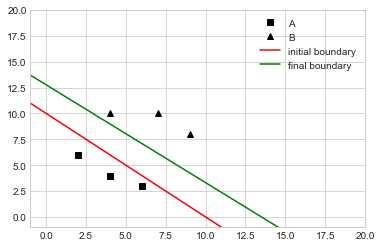

In [370]:
#train perceptron using perceptron rule, max epoch 50,000
ada.trainDeltaLearningRule(400);

In [371]:
#evaluate new coordenate (5,5)
new_p = np.array([5,5])
res = ada.evaluate(new_p);
print("res:", res);

[5 5]


ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [372]:
#evaluate new coordenate (6,8)
new_p = np.array([6,8])
res = ada.evaluate(new_p);
print("res:", res);

[6 8]


ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

important notes:
* initialization of weights and bias with random values don´t affect to find a solution
* solution could be different based on initial values and for that reason new inputs could be classified different.
* learning rate alters the speed of the training process 
* 

In [224]:
 a = np.array([ -7.,  -7.,  -8., -14. ,-17., -17.]);


In [225]:
a

array([ -7.,  -7.,  -8., -14., -17., -17.])

In [195]:
c = np.multiply(a, a) 

In [196]:
b = (a @ a);

In [197]:
b

4.649472667004416

In [198]:
c.sum()

4.6494726670044155

In [202]:
MSE = np.sum(c) / len(c)

In [203]:
MSE

0.7749121111674026

In [228]:
0.01 * a.dot(p)

array([-4.18, -5.4 ])